# Setting foot into the world of Machine Learning with IRIS.

The Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. The columns in this dataset are:
![](https://i.imgur.com/7iqseyn.png)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data

In [3]:
df = pd.read_csv('iris.csv')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.describe() # When given a mix of categorical and numerical data, then By default it describes only the attributes with numerical values. 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.describe(include ='all') # include ='all' is a parameter used to include all the numerical as well as categorical values.

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
df.species.unique()

In [ ]:
#Finding the null values in the column
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
#Count of each kind of flower species by creating a bar Plot using Pandas.
df['species'].value_counts().plot(kind='bar')

## Designing the Pairplot

The pair plot uses two basic figures - The histogram and the scatter plot. The histogram on the diagonal allows us to visualize the distribution of single variable. While the scatter plot on the uper half and lower half traingles shows the relation between two variables. 


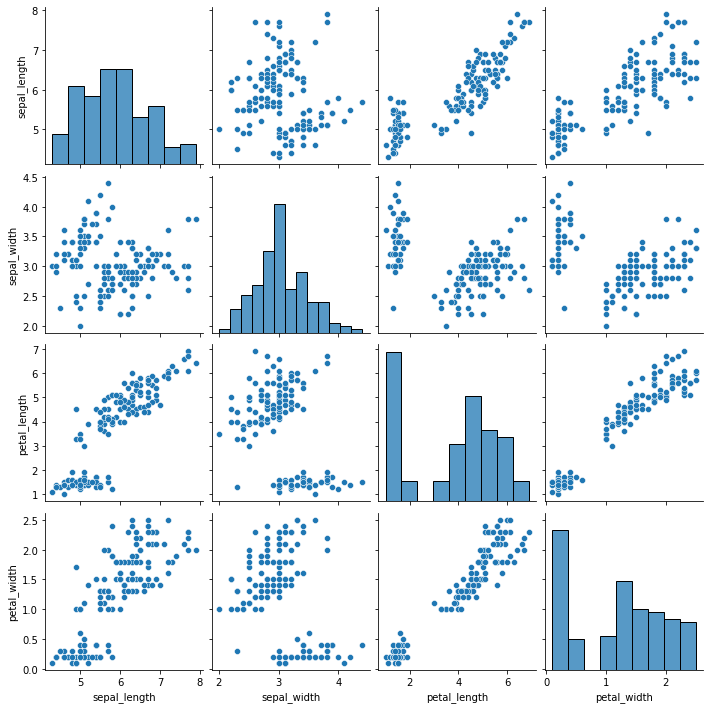

In [4]:
#Finally plotting the pair plot using the seaborn library
sns.pairplot(df)
plt.show()

Analysis of the above Pairplot: 
- First graph from the top row represents the count/frequncy distribution of SepalLengthCm
- Second graph represents weak negative relationship between SepalLengthCm and SepalWidthCm
- Third and fourth graph shows a strong positive relationship of SepalLengthCm with PetalLengthCm and PetalWidthCm

## Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [5]:
#Confirming the same by finding the correlation of all the relevant attributes.
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


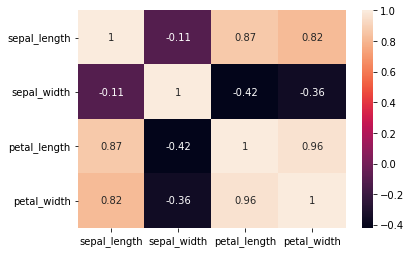

In [8]:
corr = df.corr()
sns.heatmap(corr, annot = True)

In [9]:
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [12]:
np.ones_like(corr, dtype=bool)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [13]:
np.triu(np.ones_like(corr, dtype=bool))

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

In [14]:
np.tril(np.ones_like(corr, dtype=bool))

array([[ True, False, False, False],
       [ True,  True, False, False],
       [ True,  True,  True, False],
       [ True,  True,  True,  True]])

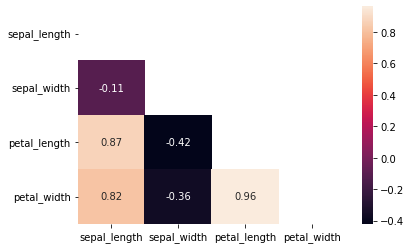

In [15]:
# Since upper half is mirror of the below half of the diagonal, you can remove either of them. 
# Generate a mask for the upper triangle.
mask = np.triu(np.ones_like(corr, dtype=bool)) 
#np.triu is used for Upper triangle of an array.
#np.ones_like: Return an array of ones with the same shape and type as a given array.
sns.heatmap(corr, annot = True, mask=mask)

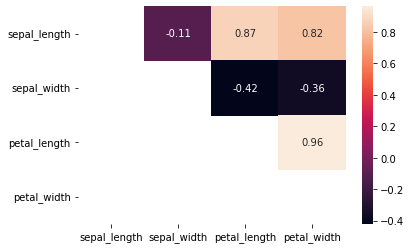

In [16]:
# Generate a mask for the lower triangle.
mask = np.tril(np.ones_like(corr, dtype=bool)) #np.tril is used for Lower triangle of an array.
sns.heatmap(corr, annot = True, mask=mask)

## Pandas Profiling: EDA with single line command

Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

- Type inference: detect the types of columns in a dataframe.
- Essentials: type, unique values, missing values
- Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
- Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
- Most frequent values
- Histogram
- Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
- Missing values matrix, count, heatmap and dendrogram of missing values
- Text analysis learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.


In [ ]:
!pip install pandas-profiling


In [ ]:
import pandas_profiling as pp
pp.ProfileReport(df)

## Applying Machine Learning to Predict the Flower Species

### Steps To Be followed When Applying an Algorithm
- Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
- Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
- Then pass the training dataset to the algorithm to train it. We use the .fit() method
- Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
- We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [21]:
# split into train and test sets
X = df.drop(['species'],axis=1)
y = df['species']
X.shape, y.shape

((150, 4), (150,))

In [24]:
from sklearn.model_selection import train_test_split


#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluate the model
y_pred = model.predict(X_test)

print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test))

The accuracy of the Logistic Regression is 0.9666666666666667


In [26]:
print('Predictions vs Actual:')
print(y_pred[0:10])
print(y_test[0:10])

Predictions vs Actual:
['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica']
14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
56     Iris-versicolor
141     Iris-virginica
44         Iris-setosa
29         Iris-setosa
120     Iris-virginica
Name: species, dtype: object


In [27]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,y_train) 
y_pred=model.predict(X_test)
print('The accuracy of the SVM is:',metrics.accuracy_score(y_pred,y_test))

The accuracy of the SVM is: 0.9666666666666667


In [28]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(y_pred,y_test))

The accuracy of the KNN is 1.0


In [29]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train) 
y_pred=model.predict(X_test) 
print('The accuracy of the Decision Tree is ',metrics.accuracy_score(y_pred,y_test))

The accuracy of the Decision Tree is  0.9666666666666667


In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
model.fit(X_train,y_train) 
y_pred=model.predict(X_test) 
print('The accuracy of the Random Forest is ',metrics.accuracy_score(y_pred,y_test))

The accuracy of the Random Forest is  0.9666666666666667


### Homework - Playing around with different combination of features

In [ ]:
petal=df[['petal_length','petal_width','species']]
sepal=df[['sepal_length','sepal_width','species']]

In [ ]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['petal_length','petal_width']]
train_y_p=train_p.species
test_x_p=test_p[['petal_length','petal_width']]
test_y_p=test_p.species

In [ ]:
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['sepal_length','sepal_width']]
train_y_s=train_s.species
test_x_s=test_s[['sepal_length','sepal_width']]
test_y_s=test_s.species

In [ ]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

In [ ]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

In [ ]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

**Observations:**

Using Petals over Sepal for training the data gives a much better accuracy.
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.

## Using PyCaret

In [6]:
!pip install pycaret==1.2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pycaret==1.2.3 (from versions: 0.0.1, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.8, 0.0.9, 0.0.10, 0.0.11, 0.0.12, 0.0.13, 0.0.14, 0.0.15, 0.0.16, 0.0.17, 0.0.18, 0.0.19, 0.0.20, 0.0.21, 0.0.22, 0.0.23, 0.0.24, 0.0.25, 0.0.26, 0.0.27, 0.0.28, 0.0.29, 0.0.30, 0.0.31, 0.0.32, 0.0.33, 0.0.34, 0.0.35, 0.0.36, 0.0.37, 0.0.38, 0.0.39, 0.0.40, 0.0.41, 0.0.43, 0.0.44, 0.0.45, 0.0.46, 0.0.47, 0.0.48, 0.0.49, 0.0.50, 0.0.51, 0.0.52, 0.0.53, 0.0.54, 0.0.55, 0.0.56, 0.0.57, 0.0.58, 0.0.59, 0.0.60, 1.0.0, 2.0, 2.1, 2.1.1, 2.1.2, 2.2, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.3.5, 2.3.6, 2.3.7, 2.3.8, 2.3.9, 2.3.10, 3.0.0rc1, 3.0.0rc2, 3.0.0rc3, 3.0.0rc4, 3.0.0rc5, 3.0.0rc6, 3.0.0rc7, 3.0.0rc8)
ERROR: No matching distribution found for pycaret==1.2.3


In [32]:
iris = sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
46/150

In [1]:
# Importing dataset
from pycaret.datasets import get_data
iris = get_data('iris')
print(iris.shape)
iris.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = iris, target = 'species')

In [ ]:
# return best model
best = compare_models()

In [ ]:
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)


In [ ]:
top3

In [ ]:

# return best model based on AUC
best = compare_models(sort = 'AUC') #default is 'Accuracy'

# compare specific models
# best_specific = compare_models(whitelist = ['dt','rf','xgboost'])

# blacklist certain models
# best_specific = compare_models(blacklist = ['catboost', 'svm'])